In [ ]:
#Demo of Orginal Keras Model

1/1 [==============================] - 7s 7s/step


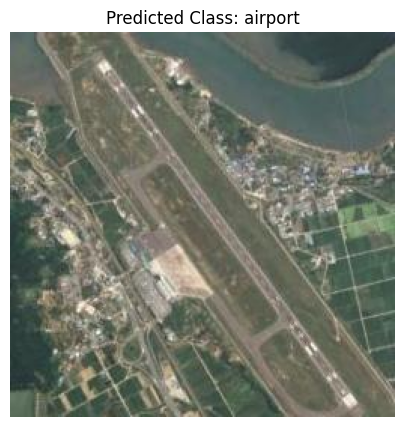

1/1 [==============================] - 0s 28ms/step


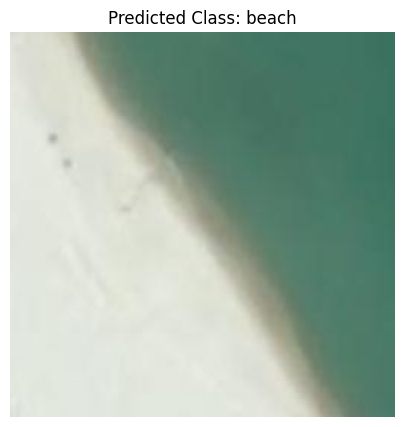

1/1 [==============================] - 0s 27ms/step


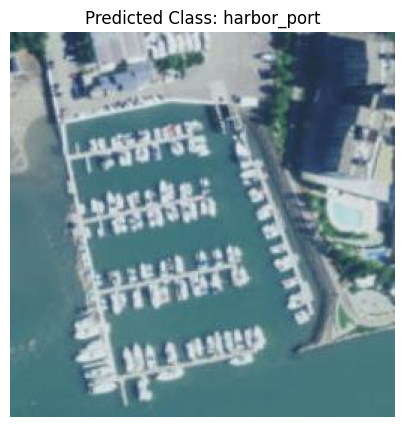

In [1]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
from PIL import Image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the MobileNetV2 model
model_path = 'MobileNetv2Earth.h5'
model = tf.keras.models.load_model(model_path)

# Define class labels and their indices
index_to_label = {
    0: 'Highway',
    1: 'airport',
    2: 'beach',
    3: 'bridge',
    4: 'buildings',
    5: 'farmland',
    6: 'forest',
    7: 'harbor_port',
    8: 'island',
    9: 'lake',
    10: 'mountain',
    11: 'river'
}

# Define image preprocessing function
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Resize image to 224x224
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Define function to classify image
def classify_image(image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)
    class_idx = np.argmax(predictions, axis=1)[0]
    class_name = index_to_label.get(class_idx, "Unknown")  # Use index_to_label mapping
    return class_name  # Return the name of the predicted class

# Define function to open file dialog, classify image, and display results
def open_file():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.gif *.tiff")]
    )
    if file_path:
        class_name = classify_image(file_path)
        
        # Display the image and the classification result using Matplotlib
        img = Image.open(file_path)
        
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Predicted Class: {class_name}")
        plt.axis('off')  # Hide axes
        
        plt.show()

# Create Tkinter GUI
root = tk.Tk()
root.title("Satellite Image Classifier")

# Add a button to open file dialog
btn_open = tk.Button(root, text="Select Image for Classification", command=open_file)
btn_open.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()


In [ ]:
#Demo of Tensorflow lite model for Edge AI devices

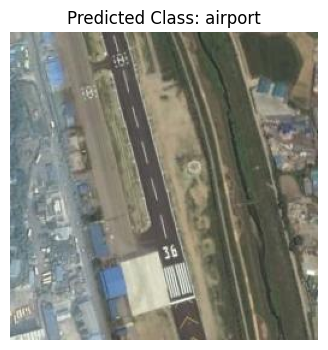

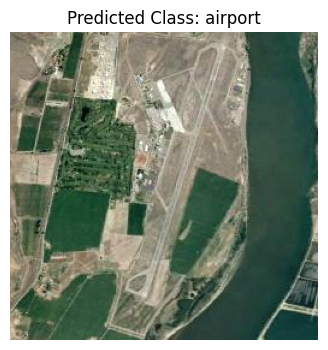

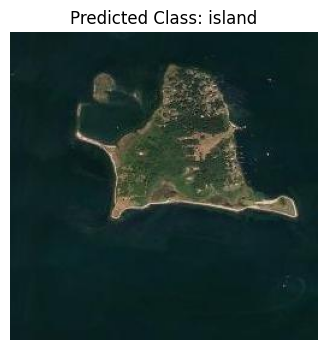

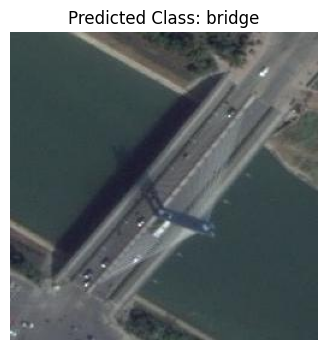

In [10]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the TensorFlow Lite model
model_path = 'MobileNetv2Earth.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Define class labels and their indices
index_to_label = {
    0: 'Highway',
    1: 'airport',
    2: 'beach',
    3: 'bridge',
    4: 'buildings',
    5: 'farmland',
    6: 'forest',
    7: 'harbor_port',
    8: 'island',
    9: 'lake',
    10: 'mountain',
    11: 'river'
}

# Function to preprocess the image
def preprocess_image(image):
    img = image.resize((224, 224))  # Resize image to 224x224
    img_array = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0).astype(np.float32)  # Add batch dimension and convert to float32
    return img_array

# Function to classify the image
def classify_image(image_path):
    img = Image.open(image_path)
    img_array = preprocess_image(img)
    
    # Get input and output tensors
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], img_array)
    
    # Run inference
    interpreter.invoke()
    
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    # Find the index of the highest probability
    class_idx = np.argmax(output_data[0])
    class_name = index_to_label.get(class_idx, "Unknown")  # Use index_to_label mapping
    return class_name, img  # Return the name of the predicted class and the image

# Function to open file dialog, classify image, and display results
def open_file():
    file_path = filedialog.askopenfilename(
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.gif *.tiff")]
    )
    if file_path:
        class_name, img = classify_image(file_path)
        
        # Display the image and the classification result using Matplotlib
        plt.figure(figsize=(4, 4))
        plt.imshow(img)
        plt.title(f"Predicted Class: {class_name}")
        plt.axis('off')  # Hide axes
        
        plt.show()

# Create Tkinter GUI
root = tk.Tk()
root.title("Satellite Image Classifier")

# Add a button to open file dialog
btn_open = tk.Button(root, text="Select Image for Classification", command=open_file)
btn_open.pack(pady=20)

# Run the Tkinter event loop
root.mainloop()
